In [3]:
import sys
print(sys.version)
print(sys.base_prefix)

3.12.9 | packaged by Anaconda, Inc. | (main, Feb  6 2025, 18:49:16) [MSC v.1929 64 bit (AMD64)]
c:\Users\leth\AppData\Local\anaconda3\envs\THERMO


IMPORT

In [4]:
#Import
import pandas as pd
import numpy as np

#Data
import json
import requests
import pickle

#Plot
import matplotlib.pyplot as plt
import seaborn as sns

# Chemistry
from rdkit import Chem
from rdkit.Chem import Descriptors
import pubchempy as pcp

DATA CURATION

In [5]:
# Open json data file
with open("all_2025_02_11.json", "r") as file:
    data = json.load(file)

In [6]:
# Define components
compA = []
compB = []

for table in data['tables']:
    compA.append(table['components'][0]['compId'])
    compB.append(table['components'][1]['compId'])

In [7]:
# Extract data

def extract_properties(table):
    columns = table['columns']
    values = table['data']

    result={}

    fixed_value_count = 0

    for col in columns:
        property_name = col['property']
        if 'fixedValue' in col:
            result[property_name] = [col['fixedValue']] * len(values)
            fixed_value_count +=1
        else:
            adjusted_index = columns.index(col) - fixed_value_count
            result[property_name] = [row[adjusted_index] for row in values]

    return result

def filter_properties(result):
    valid = ['T', 'P', 'X', 'K']
    filttered_result = [{key: value for key, value in d.items() if key in valid} for d in result]

    return filttered_result


property_extract = []

for table in data['tables']:
    property_extract.append(extract_properties(table))

filtered_data = filter_properties(property_extract)

In [8]:
for p in filtered_data:
    print(p)

{'T': [304.01, 314.0, 324.01, 333.98, 344.15, 354.05, 363.84, 293.81, 303.87, 313.81, 323.87, 333.8, 343.96, 353.8, 363.76, 293.95, 303.94, 313.85, 323.91, 333.8, 343.84, 353.83, 363.8, 293.92, 303.94, 313.8, 323.94, 333.85, 343.85, 353.8, 363.69, 293.84, 303.89, 313.86, 323.82, 333.82, 343.75, 353.79, 363.71, 283.88, 293.87, 303.79, 313.77, 323.86, 333.79, 343.73, 353.75, 363.62, 283.91, 294.01, 303.86, 313.82, 323.86, 333.82, 343.73, 353.69, 363.78, 283.79, 293.94, 303.89, 313.89, 323.83, 333.82, 343.67, 353.76, 363.76, 283.74, 293.97, 303.83, 313.86, 323.79, 333.72, 343.65, 353.58, 363.65, 293.78, 303.75, 313.76, 323.62, 333.68, 343.81, 353.83, 363.8, 293.89, 303.75, 313.78, 323.66, 333.74, 343.75, 353.69, 363.59, 293.78, 303.7, 313.73, 323.72, 333.8, 343.77, 353.7, 363.69, 293.71, 303.73, 313.66, 323.81, 333.71, 343.74, 353.58, 363.55, 303.75, 313.71, 323.67, 333.69, 343.72, 353.8, 363.87, 303.6, 313.6, 323.62, 333.55, 343.65, 353.65, 363.68], 'P': [100000.0, 100000.0, 100000.0, 10

In [9]:
comp_ids = []

for table in data['tables']:
    for column in table['columns']:
        if 'compId' in column:
            comp_ids.append(column['compId'])

print(comp_ids)

['decan-11', '2-(hydro', '2-(hydro', '2-(hydro', '(9Z)-9-o', "1,1'-met", "1,1'--08", "1,1'--09", "1,1'-oxy", 'methanol', 'acetalde', 'methanol', '1,2,3-pr', '1,2,3-pr', '1,2,3-pr', '1,2,3-pr', '1,2,3-pr', '1,2-dime', '1,2-dime', '1,2-etha', '1,2-etha', 'benzene', 'hexane', '2-but-15', '2-but-15', '1-butano', 'methanol', '2-propan', '2-propan', 'heptane', 'heptane', '2-propan', '2-propan', '2-propan', 'methanol', 'methanol', 'methanol', '1-propan', '1-propan', 'methanol', "2,2'-(1,", "2,2'-(1,", "2,2'-(1,", '1-butano', '2,3-dime', '2-propan', 'benzene', '2,2,4-tr', '2,2,5-tr', '2,2-bis(', '2-ethyl-', "2,2'-oxy", "2,2'-oxy", '1,2-d-12', '1-butano', '2,4,4-tr', '2,3-dime', '2-propan', 'heptane', 'methylbe', '2-pro-07', '2-propan', '2-propan', '2-propan', '1-butano', '2-propan', '2-propan', '2-propan', '2-propan', '2-propan', '2-propan', '2-propan', '2-propan', '2-propan', '2-propan', '2-propan', '2-propan', '2-propan', '"acetic a"', '"acetic a"', '"acetic a"', '"acetic a"', '2-propan', 'a

In [10]:
def count_decimal_places(value):
    """Returns the number of decimal places in a floating-point number."""
    str_value = str(value)
    if '.' in str_value:
        return len(str_value.split('.')[1])
    return 0  # No decimal places if the value is an integer

#This is to fix the floating point issue

In [11]:
for i in range(len(comp_ids)):
    if compA[i] == comp_ids[i]:
        filtered_data[i]['XA'] = filtered_data[i].pop('X')
        filtered_data[i]['XB'] = [
            round(1 - x, count_decimal_places(x)) for x in filtered_data[i]['XA']
        ]
    else:
        filtered_data[i]['XB'] = filtered_data[i].pop('X')
        filtered_data[i]['XA'] = [
            round(1 - x, count_decimal_places(x)) for x in filtered_data[i]['XB']
        ]

In [12]:
# Defaulting P
for entry in filtered_data:
    n = len(entry['T'])
    if 'P' not in entry:
        entry['P'] = [101325] * n

In [13]:
print (len(data['components']))

82


In [14]:
for p in filtered_data:    
    print(p)

{'T': [304.01, 314.0, 324.01, 333.98, 344.15, 354.05, 363.84, 293.81, 303.87, 313.81, 323.87, 333.8, 343.96, 353.8, 363.76, 293.95, 303.94, 313.85, 323.91, 333.8, 343.84, 353.83, 363.8, 293.92, 303.94, 313.8, 323.94, 333.85, 343.85, 353.8, 363.69, 293.84, 303.89, 313.86, 323.82, 333.82, 343.75, 353.79, 363.71, 283.88, 293.87, 303.79, 313.77, 323.86, 333.79, 343.73, 353.75, 363.62, 283.91, 294.01, 303.86, 313.82, 323.86, 333.82, 343.73, 353.69, 363.78, 283.79, 293.94, 303.89, 313.89, 323.83, 333.82, 343.67, 353.76, 363.76, 283.74, 293.97, 303.83, 313.86, 323.79, 333.72, 343.65, 353.58, 363.65, 293.78, 303.75, 313.76, 323.62, 333.68, 343.81, 353.83, 363.8, 293.89, 303.75, 313.78, 323.66, 333.74, 343.75, 353.69, 363.59, 293.78, 303.7, 313.73, 323.72, 333.8, 343.77, 353.7, 363.69, 293.71, 303.73, 313.66, 323.81, 333.71, 343.74, 353.58, 363.55, 303.75, 313.71, 323.67, 333.69, 343.72, 353.8, 363.87, 303.6, 313.6, 323.62, 333.55, 343.65, 353.65, 363.68], 'P': [100000.0, 100000.0, 100000.0, 10

In [15]:
print(len(filtered_data))

262


GET DATA OF PURE COMPOUNDS

In [16]:
single_list = []
car = []
full_name = []
for component in data['components']:
    single_list.append(component['compId'])
    car.append(component['car'])
    full_name.append(component['name'])


In [17]:
print(single_list)

['dodecano', 'decanoic', 'cyclohex', '2-methyl', '2,2-bis(', '2,5,8,11', '2,5,8-01', 'ethanol', 'acetic a', '1-butano', "1,1'-oxy", '2-propan', 'n-butane', '1,3,3-tr', 'cyclo-02', 'decane', '2,4,4-tr', '1-propan', 'methanol', '1-decene', 'aceti-03', '2-ethyl-', '1,4-dime', '1,2-dime', 'methylcy', 'tetradec', 'cyclopen', '2,3-dime', '1-octano', '1-nonano', 'heptane', "2,2'-oxy", "1,1'--04", 'dodec-05', '3-methyl', 'benzene', '(9Z)-9-o', '1-hexene', 'ethylben', 'decan-06', '2-pro-07', "1,1'--08", '(2R,3S)-', '2-butano', "1,1'-bip", "1,1'--09", '(1R-(1a,', '2,2,5-tr', '1-hexano', 'dodecane', "1,1'-met", "1,1'--10", 'tridecan', 'octane', 'decan-11', "1,1'-[ox", '1-dodeca', '1,2-etha', 'acetalde', '1-pentan', '1,2-d-12', '2-(hydro', 'pentane', '2-met-13', "2,2'-(1,", 'aceti-14', '3,6,9,12', '1-undeca', '1-heptan', '2-but-15', 'hexane', '1,2,3-pr', 'tetra-16', 'methane', '1-nonene', 'undecane', 'hexadeca', 'methylbe', '2,2-dime', '2,2,4-tr', 'propane', '3-pentan']


In [18]:
for c in car:
    print(c)

111-82-0
110-42-9
110-82-7
78-83-1
115-77-5
112-49-2
143-24-8
64-17-5
123-86-4
71-36-3
142-96-1
67-64-1
106-97-8
470-82-6
108-94-1
124-18-5
107-39-1
71-23-8
67-56-1
872-05-9
108-24-7
77-99-6
106-42-3
110-71-4
108-87-2
124-10-7
287-92-3
79-29-8
111-87-5
143-08-8
142-82-5
111-46-6
60-29-7
106-33-2
123-51-3
71-43-2
122-32-7
592-41-6
100-41-4
110-38-3
67-63-0
111-96-6
149-32-6
78-93-3
92-52-4
101-84-8
2216-51-5
3522-94-9
111-27-3
112-40-3
3178-23-2
101-81-5
629-50-5
111-65-9
334-48-5
112-73-2
112-53-8
107-21-1
75-07-0
71-41-0
95-47-6
77-85-0
109-66-0
75-65-0
112-27-6
141-78-6
2615-15-8
112-42-5
111-70-6
78-92-2
110-54-3
56-81-5
629-59-4
74-82-8
124-11-8
1120-21-4
544-76-3
108-88-3
126-30-7
540-84-1
74-98-6
96-22-0


In [19]:
for f in full_name:
    print(f)

dodecanoic acid methyl ester
decanoic acid methyl ester
cyclohexane
2-methyl-1-propanol
2,2-bis(hydroxymethyl)-1,3-propanediol
2,5,8,11-tetraoxadodecane
2,5,8,11,14-pentaoxapentadecane
ethanol
acetic acid butyl ester
1-butanol
1,1'-oxybisbutane
2-propanone
n-butane
1,3,3-trimethyl-2-oxabicyclo[2.2.2]octane
cyclohexanone
decane
2,4,4-trimethyl-1-pentene
1-propanol
methanol
1-decene
acetic acid anhydride
2-ethyl-2-(hydroxymethyl)-1,3-propanediol
1,4-dimethylbenzene
1,2-dimethoxyethane
methylcyclohexane
tetradecanoic acid methyl ester
cyclopentane
2,3-dimethylbutane
1-octanol
1-nonanol
heptane
2,2'-oxybisethanol
1,1'-oxybisethane
dodecanoic acid ethyl ester
3-methyl-1-butanol
benzene
(9Z)-9-octadecenoic acid 1,2,3-propanetriyl ester
1-hexene
ethylbenzene
decanoic acid ethyl ester
2-propanol
1,1'-oxybis(2-methoxyethane)
(2R,3S)-rel-1,2,3,4-butanetetrol
2-butanone
1,1'-biphenyl
1,1'-oxybisbenzene
(1R-(1alpha,2beta,5alpha))-5-methyl-2-(1-methylethyl)cyclohexanol
2,2,5-trimethylhexane
1-hexan

DATA VISUALIZATION

<function matplotlib.pyplot.show(close=None, block=None)>

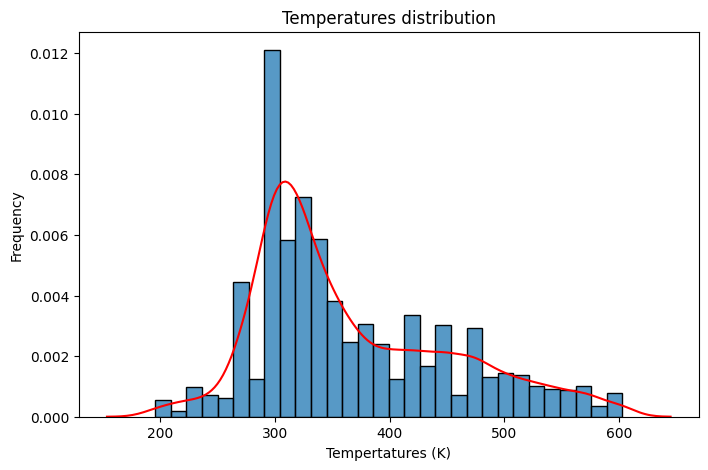

In [20]:
temperatures = []

for row in filtered_data:
    for number in row['T']:
        temperatures.append(number)

plt.figure(figsize=(8,5))
sns.histplot(temperatures, bins=30, kde=False, stat='density')
sns.kdeplot(temperatures, color='red')
plt.xlabel('Tempertatures (K)')
plt.ylabel('Frequency')
plt.title('Temperatures distribution')
plt.show

In [21]:
data_dist = []
for p in filtered_data:
    data_dist.append(len(p['T']))

<function matplotlib.pyplot.show(close=None, block=None)>

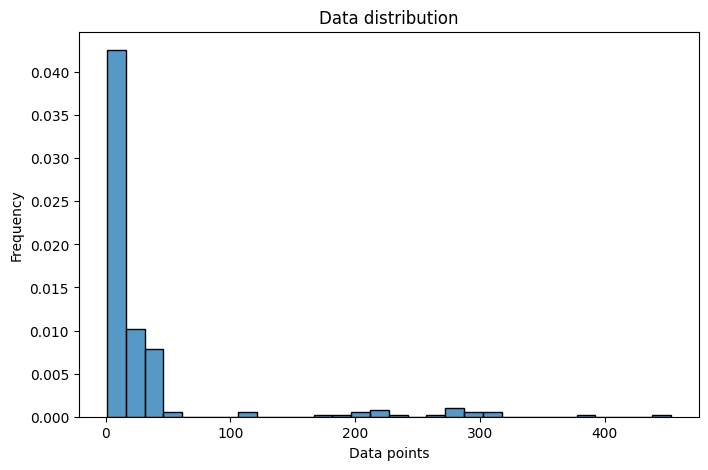

In [22]:
plt.figure(figsize=(8,5))
sns.histplot(data_dist, bins=30, kde=False, stat='density')
plt.xlabel('Data points')
plt.ylabel('Frequency')
plt.title('Data distribution')
plt.show

In [23]:
# Datapoint statistics
sum = 0
for d in data_dist:
    sum += d

print('Total datapoints =', sum)

import statistics

median_datapoints = statistics.median(data_dist)
mean_datapoints = statistics.mean(data_dist)

print('Mean =', mean_datapoints)
print('Median =', median_datapoints)
print('Number of compounds =', len(car))
print('Number of mixtures =', len(data['tables']))

Total datapoints = 8610
Mean = 32.86259541984733
Median = 10.0
Number of compounds = 82
Number of mixtures = 262


<function matplotlib.pyplot.show(close=None, block=None)>

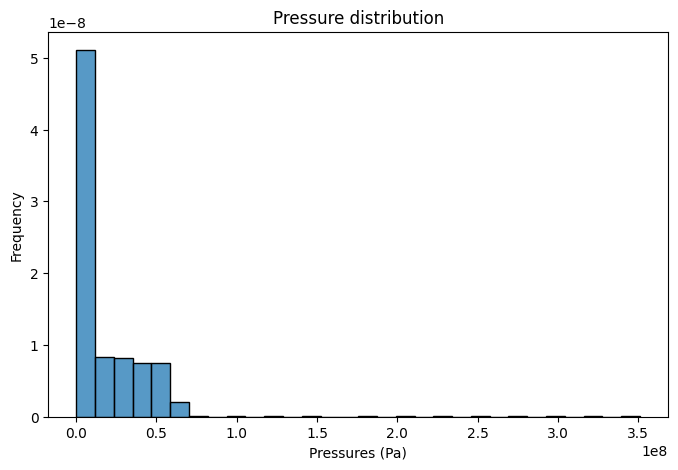

In [24]:
pressures = []

for row in filtered_data:
    for number in row['P']:
        pressures.append(number)

plt.figure(figsize=(8,5))
sns.histplot(pressures, bins=30, kde=False, stat='density')
plt.xlabel('Pressures (Pa)')
plt.ylabel('Frequency')
plt.title('Pressure distribution')
plt.show

CONCATENATE DATA

In [25]:
for p in filtered_data:
    print(p)

{'T': [304.01, 314.0, 324.01, 333.98, 344.15, 354.05, 363.84, 293.81, 303.87, 313.81, 323.87, 333.8, 343.96, 353.8, 363.76, 293.95, 303.94, 313.85, 323.91, 333.8, 343.84, 353.83, 363.8, 293.92, 303.94, 313.8, 323.94, 333.85, 343.85, 353.8, 363.69, 293.84, 303.89, 313.86, 323.82, 333.82, 343.75, 353.79, 363.71, 283.88, 293.87, 303.79, 313.77, 323.86, 333.79, 343.73, 353.75, 363.62, 283.91, 294.01, 303.86, 313.82, 323.86, 333.82, 343.73, 353.69, 363.78, 283.79, 293.94, 303.89, 313.89, 323.83, 333.82, 343.67, 353.76, 363.76, 283.74, 293.97, 303.83, 313.86, 323.79, 333.72, 343.65, 353.58, 363.65, 293.78, 303.75, 313.76, 323.62, 333.68, 343.81, 353.83, 363.8, 293.89, 303.75, 313.78, 323.66, 333.74, 343.75, 353.69, 363.59, 293.78, 303.7, 313.73, 323.72, 333.8, 343.77, 353.7, 363.69, 293.71, 303.73, 313.66, 323.81, 333.71, 343.74, 353.58, 363.55, 303.75, 313.71, 323.67, 333.69, 343.72, 353.8, 363.87, 303.6, 313.6, 323.62, 333.55, 343.65, 353.65, 363.68], 'P': [100000.0, 100000.0, 100000.0, 10

In [26]:
dfs = []
for i, d in enumerate(filtered_data):
    df = pd.DataFrame(d)
    df['compA'] = compA[i]
    df['compB'] = compB[i]
    dfs.append(df)

concat_df = pd.concat(dfs)

In [27]:
name_mapping = dict(zip(single_list, full_name))

concat_df['compA'] = concat_df['compA'].map(name_mapping)
concat_df['compB'] = concat_df['compB'].map(name_mapping)

In [28]:
# Reorder dataframe
ordering = ['compA', 'compB', 'XA', 'XB', 'T', 'P', 'K']
concat_df = concat_df[ordering]

In [29]:
print(pd.concat([concat_df.head(), concat_df.tail()]))

                                                compA  \
0   (1R-(1alpha,2beta,5alpha))-5-methyl-2-(1-methy...   
1   (1R-(1alpha,2beta,5alpha))-5-methyl-2-(1-methy...   
2   (1R-(1alpha,2beta,5alpha))-5-methyl-2-(1-methy...   
3   (1R-(1alpha,2beta,5alpha))-5-methyl-2-(1-methy...   
4   (1R-(1alpha,2beta,5alpha))-5-methyl-2-(1-methy...   
27                                           undecane   
28                                           undecane   
29                                           undecane   
30                                           undecane   
31                                           undecane   

                              compB      XA      XB       T         P       K  
0                     decanoic acid  0.8000  0.2000  304.01  100000.0  0.1229  
1                     decanoic acid  0.8000  0.2000  314.00  100000.0  0.1218  
2                     decanoic acid  0.8000  0.2000  324.01  100000.0  0.1211  
3                     decanoic acid  0.8000  0.2000 

CAS TO SMILES & MOLECULAR WEIGHT

In [48]:
# Get SMILES and MWs fron CAS numbers
def get_cactus_data(cas, property):
    url = f'https://cactus.nci.nih.gov/chemical/structure/{cas}/{property}'
    response = requests.get(url)
    return response.text.strip()

SMILES = []
MWs = []

for c in car:
    SMILES.append(get_cactus_data(c, 'smiles'))
    MWs.append(get_cactus_data(c, 'mw'))

In [49]:
df = pd.DataFrame({'CAS': car, 'SMILES': SMILES, 'MW': MWs})
print(len(df))

82


In [50]:
# Retrieve XA and XB units
units = []

for table in data['tables']:
    for column in table['columns']:
        if 'unit' in column:
            units.append(column['unit'])

units = [unit for unit in units if unit in ['kg/kg', 'mol/mol']]

In [51]:
# Reshape units
reshaped_units = []

for idx, f in enumerate(filtered_data):
    T_length = len(f['T'])
    reshaped_units.extend([units[idx]] * T_length)

print(len(reshaped_units))

8610


In [52]:
# Map compA, compB to corresponding CAS, SMILES, MW
compound_data = dict(zip(full_name, zip(car, SMILES, MWs)))

def map_compound_data(compound, data_dict):
    return data_dict.get(compound, (None, None, None))

concat_df[['CAS_A','SMILES_A','MW_A']] = concat_df['compA'].apply(lambda x: pd.Series(map_compound_data(x, compound_data)))
concat_df[['CAS_B','SMILES_B','MW_B']] = concat_df['compB'].apply(lambda x: pd.Series(map_compound_data(x, compound_data)))

In [53]:
# List of columns to convert to numeric
columns_to_convert = ['XA', 'XB', 'MW_A', 'MW_B']

# Convert the listed columns to numeric
concat_df[columns_to_convert] = concat_df[columns_to_convert].apply(pd.to_numeric, errors='coerce')


In [54]:
concat_df['X_unit'] = reshaped_units

def convertX(row):
    if row['X_unit'] == 'kg/kg':
        row['XA'] = (row['XA'] / row['MW_A'])/((row['XA'] / row['MW_A']) + (row['XB'] / row['MW_B']))
        row['XB'] = (row['XB'] / row['MW_B'])/((row['XA'] / row['MW_A']) + (row['XB'] / row['MW_B']))
    return row

converted_df = concat_df.apply(convertX, axis=1)
converted_df.drop(columns='X_unit', inplace=True)
converted_df.head()

,compA,compB,XA,XB,T,P,K,CAS_A,SMILES_A,MW_A,CAS_B,SMILES_B,MW_B
0,"(1R-(1alpha,2beta,5alpha))-5-methyl-2-(1-methy...",decanoic acid,0.8,0.2,304.01,100000.0,0.1229,2216-51-5,CC(C)[C@@H]1CC[C@@H](C)C[C@H]1O,156.2674,334-48-5,CCCCCCCCCC(O)=O,172.2668
1,"(1R-(1alpha,2beta,5alpha))-5-methyl-2-(1-methy...",decanoic acid,0.8,0.2,314.00,100000.0,0.1218,2216-51-5,CC(C)[C@@H]1CC[C@@H](C)C[C@H]1O,156.2674,334-48-5,CCCCCCCCCC(O)=O,172.2668
2,"(1R-(1alpha,2beta,5alpha))-5-methyl-2-(1-methy...",decanoic acid,0.8,0.2,324.01,100000.0,0.1211,2216-51-5,CC(C)[C@@H]1CC[C@@H](C)C[C@H]1O,156.2674,334-48-5,CCCCCCCCCC(O)=O,172.2668
3,"(1R-(1alpha,2beta,5alpha))-5-methyl-2-(1-methy...",decanoic acid,0.8,0.2,333.98,100000.0,0.1204,2216-51-5,CC(C)[C@@H]1CC[C@@H](C)C[C@H]1O,156.2674,334-48-5,CCCCCCCCCC(O)=O,172.2668
4,"(1R-(1alpha,2beta,5alpha))-5-methyl-2-(1-methy...",decanoic acid,0.8,0.2,344.15,100000.0,0.1194,2216-51-5,CC(C)[C@@H]1CC[C@@H](C)C[C@H]1O,156.2674,334-48-5,CCCCCCCCCC(O)=O,172.2668


In [55]:
# Create columns of mass fractions
converted_df['mA'] = (converted_df['XA'] * converted_df['MW_A']) / (converted_df['XA'] * converted_df['MW_A'] + converted_df['XB'] * converted_df['MW_B'])
converted_df['mB'] = 1 - converted_df['mA']

In [56]:
ordering = ['compA', 'compB', 'XA', 'XB', 'T', 'P', 'K', 'mA', 'mB', 'CAS_A', 'CAS_B', 'SMILES_A', 'SMILES_B', 'MW_A', 'MW_B']
converted_df = converted_df[ordering]
converted_df.head()

,compA,compB,XA,XB,T,P,K,mA,mB,CAS_A,CAS_B,SMILES_A,SMILES_B,MW_A,MW_B
0,"(1R-(1alpha,2beta,5alpha))-5-methyl-2-(1-methy...",decanoic acid,0.8,0.2,304.01,100000.0,0.1229,0.783947,0.216053,2216-51-5,334-48-5,CC(C)[C@@H]1CC[C@@H](C)C[C@H]1O,CCCCCCCCCC(O)=O,156.2674,172.2668
1,"(1R-(1alpha,2beta,5alpha))-5-methyl-2-(1-methy...",decanoic acid,0.8,0.2,314.00,100000.0,0.1218,0.783947,0.216053,2216-51-5,334-48-5,CC(C)[C@@H]1CC[C@@H](C)C[C@H]1O,CCCCCCCCCC(O)=O,156.2674,172.2668
2,"(1R-(1alpha,2beta,5alpha))-5-methyl-2-(1-methy...",decanoic acid,0.8,0.2,324.01,100000.0,0.1211,0.783947,0.216053,2216-51-5,334-48-5,CC(C)[C@@H]1CC[C@@H](C)C[C@H]1O,CCCCCCCCCC(O)=O,156.2674,172.2668
3,"(1R-(1alpha,2beta,5alpha))-5-methyl-2-(1-methy...",decanoic acid,0.8,0.2,333.98,100000.0,0.1204,0.783947,0.216053,2216-51-5,334-48-5,CC(C)[C@@H]1CC[C@@H](C)C[C@H]1O,CCCCCCCCCC(O)=O,156.2674,172.2668
4,"(1R-(1alpha,2beta,5alpha))-5-methyl-2-(1-methy...",decanoic acid,0.8,0.2,344.15,100000.0,0.1194,0.783947,0.216053,2216-51-5,334-48-5,CC(C)[C@@H]1CC[C@@H](C)C[C@H]1O,CCCCCCCCCC(O)=O,156.2674,172.2668


In [57]:
converted_df = converted_df.drop_duplicates()

In [58]:
# Extract the rows where XA == 1 or XB == 1
subsetA = converted_df[converted_df['XA'] == 1][['compA', 'T', 'P', 'K']]
subsetB = converted_df[converted_df['XB'] == 1][['compB', 'T', 'P', 'K']]

# Assign K value based on compA, T, P combination
def assign_KA(row):
    # Check if the current combination of compA, T, P exists in the subset
    match = subsetA[(subsetA['compA'] == row['compA']) & 
                   (subsetA['T'] == row['T']) & 
                   (subsetA['P'] == row['P'])]
    
    # If there's a match, return the corresponding K, otherwise return NaN
    if not match.empty:
        return match['K'].values[0]
    else:
        return None  # Create a blank (NaN) value for no match
    
def assign_KB(row):
    match = subsetB[(subsetB['compB'] == row['compB']) & 
                   (subsetB['T'] == row['T']) & 
                   (subsetB['P'] == row['P'])]
    
    if not match.empty:
        return match['K'].values[0]
    else:
        return None

# Create the KA & KB columns
converted_df['KA'] = converted_df.apply(assign_KA, axis=1)
converted_df['KB'] = converted_df.apply(assign_KB, axis=1)


In [59]:
# Count rows where KA, KB and both NaN
missing_KA = converted_df['KA'].isna().sum()
missing_KB = converted_df['KB'].isna().sum()
missing_both = converted_df[converted_df['KA'].isna() & converted_df['KB'].isna()].shape[0]

# You can print the results
print(f"Rows without value for KA: {missing_KA}")
print(f"Rows without value for KB: {missing_KB}")
print(f"Rows without value for both KA and KB: {missing_both}")

Rows without value for KA: 6928
Rows without value for KB: 6956
Rows without value for both KA and KB: 6917


In [60]:
# Count rows where KA, KB or both is not NaN
non_missing_KA = len(converted_df) - missing_KA
non_missing_KB = len(converted_df) - missing_KB

non_missing_both = converted_df[converted_df['KA'].notna() & converted_df['KB'].notna()].shape[0]

# Print the results
print(f"Rows with value for KA: {non_missing_KA}")
print(f"Rows with value for KB: {non_missing_KB}")
print(f"Rows with value for both KA and KB: {non_missing_both}")


Rows with value for KA: 1492
Rows with value for KB: 1464
Rows with value for both KA and KB: 1453


In [61]:
# Export to excel
# export_small = converted_df[['compA', 'compB', 'T', 'P', 'XA', 'XB', 'K', 'KA', 'KB']]
# converted_df.to_excel('export.xlsx', index=False)
# export_small.to_excel('export_small.xlsx', index=False)

In [66]:
# Extract rows where all columns have data (no NaN values)
cleaned_df = converted_df.dropna(how='any')

# Save whole DataFrame
with open('converted_df.pkl', 'wb') as f:
    pickle.dump(converted_df, f)

# Save the cleaned DataFrame
with open('cleaned_df.pkl', 'wb') as f:
    pickle.dump(cleaned_df, f)

In [63]:
converted_df.head()

,compA,compB,XA,XB,T,P,K,mA,mB,CAS_A,CAS_B,SMILES_A,SMILES_B,MW_A,MW_B,KA,KB
0,"(1R-(1alpha,2beta,5alpha))-5-methyl-2-(1-methy...",decanoic acid,0.8,0.2,304.01,100000.0,0.1229,0.783947,0.216053,2216-51-5,334-48-5,CC(C)[C@@H]1CC[C@@H](C)C[C@H]1O,CCCCCCCCCC(O)=O,156.2674,172.2668,NaN,NaN
1,"(1R-(1alpha,2beta,5alpha))-5-methyl-2-(1-methy...",decanoic acid,0.8,0.2,314.00,100000.0,0.1218,0.783947,0.216053,2216-51-5,334-48-5,CC(C)[C@@H]1CC[C@@H](C)C[C@H]1O,CCCCCCCCCC(O)=O,156.2674,172.2668,NaN,NaN
2,"(1R-(1alpha,2beta,5alpha))-5-methyl-2-(1-methy...",decanoic acid,0.8,0.2,324.01,100000.0,0.1211,0.783947,0.216053,2216-51-5,334-48-5,CC(C)[C@@H]1CC[C@@H](C)C[C@H]1O,CCCCCCCCCC(O)=O,156.2674,172.2668,NaN,NaN
3,"(1R-(1alpha,2beta,5alpha))-5-methyl-2-(1-methy...",decanoic acid,0.8,0.2,333.98,100000.0,0.1204,0.783947,0.216053,2216-51-5,334-48-5,CC(C)[C@@H]1CC[C@@H](C)C[C@H]1O,CCCCCCCCCC(O)=O,156.2674,172.2668,NaN,NaN
4,"(1R-(1alpha,2beta,5alpha))-5-methyl-2-(1-methy...",decanoic acid,0.8,0.2,344.15,100000.0,0.1194,0.783947,0.216053,2216-51-5,334-48-5,CC(C)[C@@H]1CC[C@@H](C)C[C@H]1O,CCCCCCCCCC(O)=O,156.2674,172.2668,NaN,NaN


In [64]:
cleaned_df.head()

,compA,compB,XA,XB,T,P,K,mA,mB,CAS_A,CAS_B,SMILES_A,SMILES_B,MW_A,MW_B,KA,KB
0,"1,1'-oxybis(2-methoxyethane)",dodecane,0.000,1.000,298.15,101325.0,0.136,0.000000,1.000000,111-96-6,112-40-3,COCCOCCOC,CCCCCCCCCCCC,134.1748,170.3374,0.1538,0.136
1,"1,1'-oxybis(2-methoxyethane)",dodecane,0.093,0.907,298.15,101325.0,0.1363,0.074732,0.925268,111-96-6,112-40-3,COCCOCCOC,CCCCCCCCCCCC,134.1748,170.3374,0.1538,0.136
2,"1,1'-oxybis(2-methoxyethane)",dodecane,0.147,0.853,298.15,101325.0,0.1359,0.119522,0.880478,111-96-6,112-40-3,COCCOCCOC,CCCCCCCCCCCC,134.1748,170.3374,0.1538,0.136
3,"1,1'-oxybis(2-methoxyethane)",dodecane,0.296,0.704,298.15,101325.0,0.1363,0.248794,0.751206,111-96-6,112-40-3,COCCOCCOC,CCCCCCCCCCCC,134.1748,170.3374,0.1538,0.136
4,"1,1'-oxybis(2-methoxyethane)",dodecane,0.420,0.580,298.15,101325.0,0.138,0.363221,0.636779,111-96-6,112-40-3,COCCOCCOC,CCCCCCCCCCCC,134.1748,170.3374,0.1538,0.136


In [65]:
print(len(cleaned_df))

1453
